In [18]:
%load_ext autoreload
%autoreload 2
import cv2

participant_number = '3'
video_path = f"./datasets/MIT/Videos/P{participant_number}.avi"


cap = cv2.VideoCapture(video_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from models.frame import Frame
from typing import List
import random

frames: List[Frame] = []
cap = cv2.VideoCapture(video_path)
while True:
    ret, frame_image = cap.read()
    if not ret:
        break
    frames.append(Frame(len(frames), participant_number, frame_image))
cap.release()
num_selected_frames = 20
frames_selection = random.sample(frames, num_selected_frames)

# Facial Landmarks

In [ ]:


from utils.face_analyzer import FaceAnalyzer


face_analyzer = FaceAnalyzer()

for frame in frames_selection:
    detected_faces_landmarks = face_analyzer.process_image_results(frame.image)
    frame.facial_landmarks_obj= face_analyzer.get_largest_face_landmarks_obj(frame.image, detected_faces_landmarks)
    if frame.facial_landmarks_obj:
        frame.facial_landmarks = frame.facial_landmarks_obj.landmark

# Face

In [21]:

for frame in frames_selection:
    if frame.facial_landmarks:
        frame.face = face_analyzer.get_face_coordinates(frame.facial_landmarks, frame.image)

# Smile

In [22]:
# for frame in frames_selection:
#     frame.smile = face_analyzer.get_smile(frame.image, frame.face) if frame.face is not None else None

# Selected Facial Features

In [23]:
for frame in frames_selection:
    frame.selected_facial_landmarks = face_analyzer.get_selected_facial_landmarks(frame.facial_landmarks)

# Head Pose

In [24]:
for frame in frames_selection:
    frame.face_angles = face_analyzer.get_face_angles(frame.image, frame.facial_landmarks)

# Display Frames

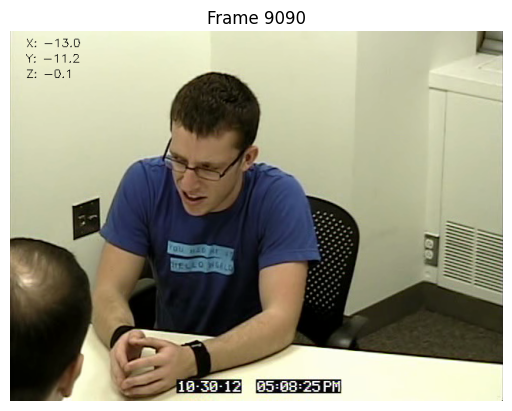

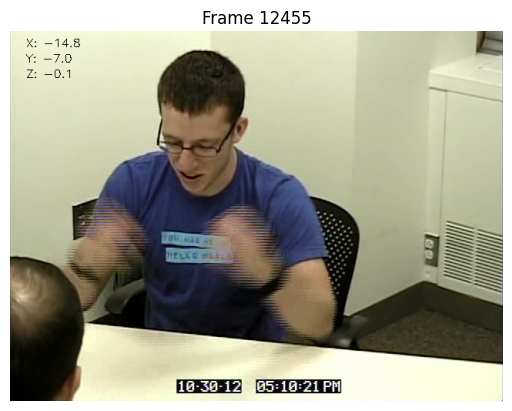

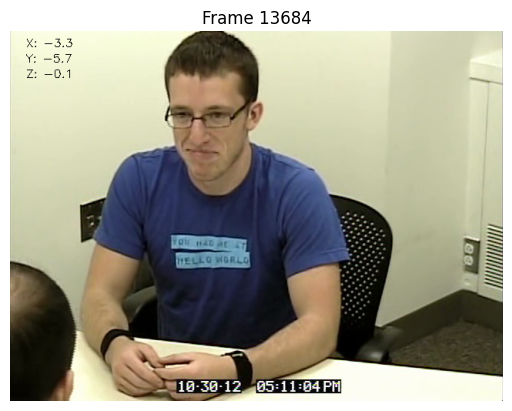

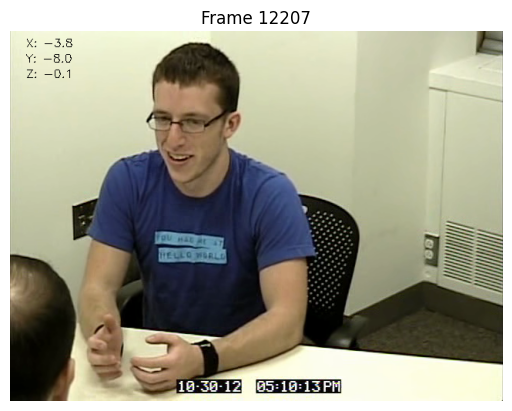

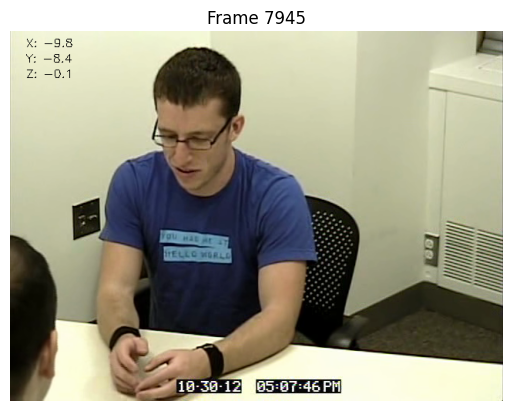

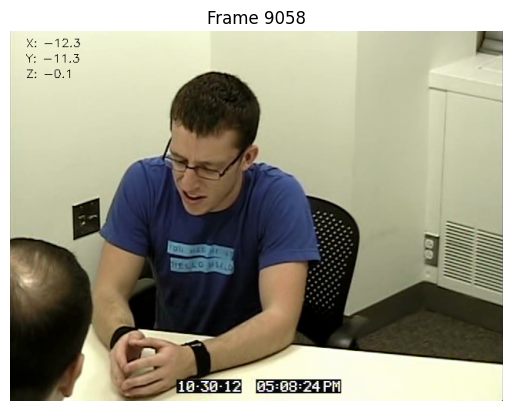

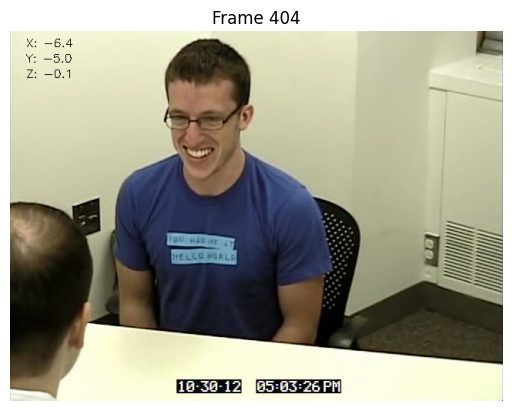

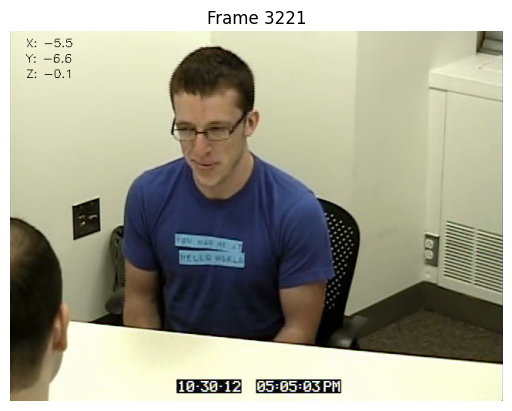

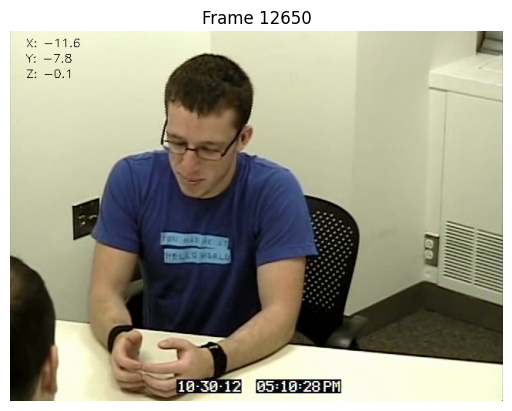

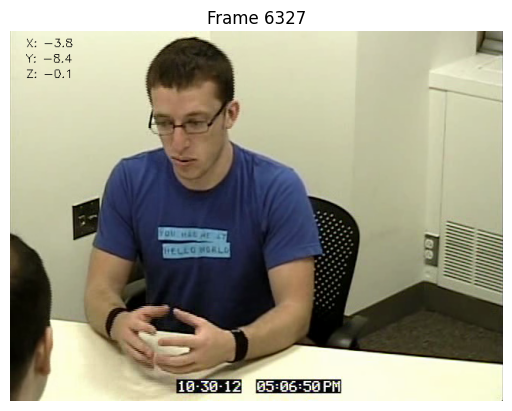

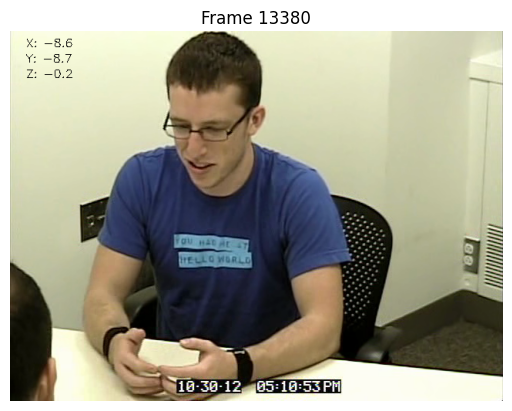

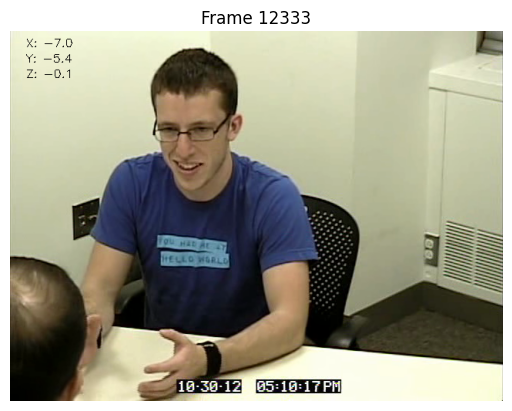

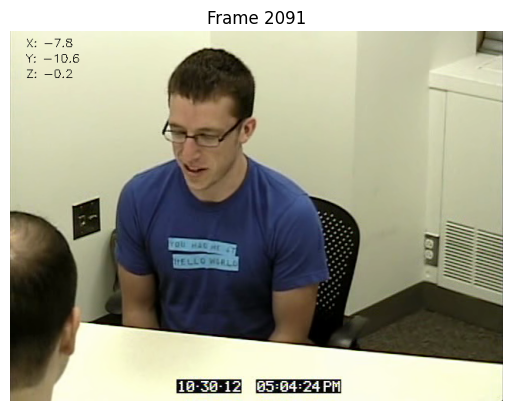

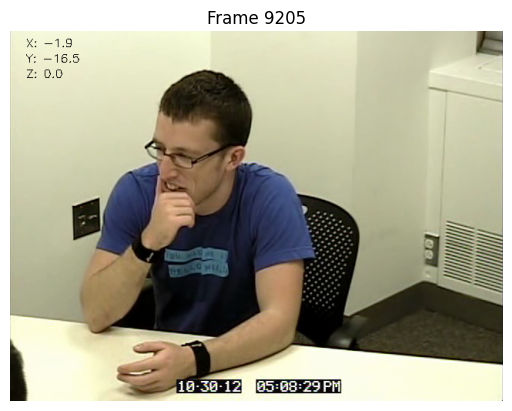

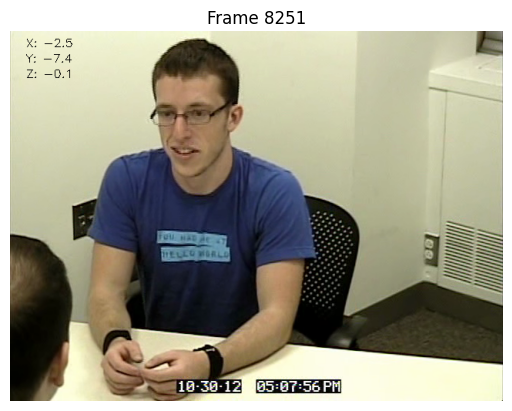

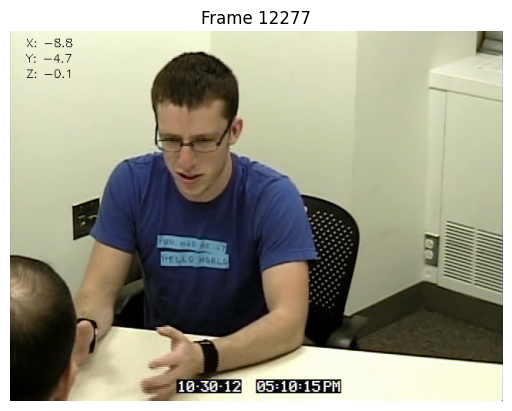

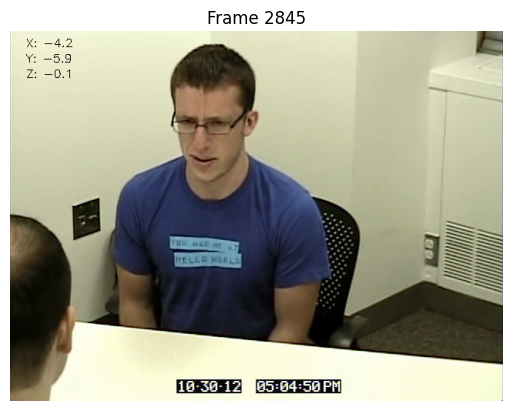

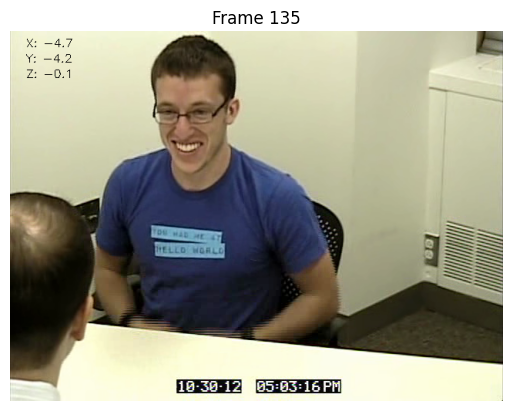

In [25]:
for frame in frames_selection:
    frame.reset_drawable_image()
    # frame.draw_face()
    # frame.draw_smile()
    # frame.draw_selected_facial_landmarks(draw_lines=False)
    frame.put_face_angles()
    # frame.draw_facial_landmarks()
    frame.display()